Pustaka yang Diperlukan

In [268]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [269]:
!pip install scikit-learn --upgrade

data set yang diperlukan

In [270]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Obesity Classification (1).csv')

data teratas

In [271]:
print(data.head(20))

    ID  Age  Gender  Height  Weight   BMI          Label
0    1   25    Male     175      80  25.3  Normal Weight
1    2   30  Female     160      60  22.5  Normal Weight
2    3   35    Male     180      90  27.3     Overweight
3    4   40  Female     150      50  20.0    Underweight
4    5   45    Male     190     100  31.2          Obese
5    6   50  Female     140      40  16.7    Underweight
6    7   55    Male     200     110  34.2          Obese
7    8   60  Female     130      30  13.3    Underweight
8    9   65    Male     210     120  37.2          Obese
9   10   70  Female     120      20  10.0    Underweight
10  11   18    Male     175      70  23.4  Normal Weight
11  12   23  Female     160      50  20.0    Underweight
12  13   28    Male     180      80  25.3  Normal Weight
13  14   33  Female     150      60  22.5  Normal Weight
14  15   38    Male     190      90  27.3     Overweight
15  16   43  Female     140      50  20.0    Underweight
16  17   48    Male     200    

untuk mengetahui jumlah kolom yang ada

In [272]:
data.shape

(108, 7)

melihat kolom apa saja yang ada

In [273]:
data.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

melihat data colunms

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


untuk mengetahui jumlah kolom yang ada

ringkasan statistik dataset

In [275]:
print(data.describe())

               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


untuk menampilkan nilai unik dari kolom yang relevan

In [276]:

print("Unique value of Gender: ", data["Gender"].unique())
print("Unique value of Label: ", data["Label"].unique())

Unique value of Gender:  ['Male' 'Female']
Unique value of Label:  ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


untuk mengetahui jumlah data yang ada

In [277]:
print(data["Gender"].value_counts())

Gender
Male      56
Female    52
Name: count, dtype: int64


In [278]:
print(data["Age"].value_counts())

Age
25    2
30    2
35    2
40    2
45    2
     ..
14    1
34    1
13    1
12    1
11    1
Name: count, Length: 75, dtype: int64


In [279]:
print(data["Weight"].value_counts())

Weight
75     9
30     8
55     8
85     8
65     7
40     6
50     6
25     6
35     5
20     5
95     5
45     5
60     4
15     4
90     3
110    3
100    3
80     3
105    3
120    2
70     2
10     2
115    1
Name: count, dtype: int64


In [280]:
print(data["Height"].value_counts())

Height
175    12
160    12
180    12
190    12
150    11
140    10
200    10
130    10
210    10
120     9
Name: count, dtype: int64


In [281]:
print(data["BMI"].value_counts())

BMI
16.7    11
13.3     8
21.2     8
10.0     7
22.7     7
20.0     6
24.2     5
26.1     5
18.7     5
8.3      4
5.6      4
25.0     4
27.0     4
22.5     4
25.3     3
27.3     3
31.2     3
27.5     3
34.2     3
28.9     3
37.2     2
23.4     2
3.9      2
29.1     1
30.8     1
Name: count, dtype: int64


In [282]:
print(data["Label"].value_counts())

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


untuk mengetahui jumlah data yang kosong

In [283]:
print(data.isnull().sum())

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


menghapus duplicate data

In [284]:
data = data.drop_duplicates()


In [285]:
data.drop_duplicates(inplace=True)

In [286]:
data.duplicated().sum()

np.int64(0)

histogram dari klasifikasi obesitas

In [287]:
# Memisahkan fitur dan label
X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = data['Label']

In [288]:
# Memisahkan fitur dan label
X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = data['Label']

In [289]:
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

/tmp/ipython-input-289-746942265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})


In [340]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ensure 'Gender' is encoded in the original data BEFORE splitting
# Assuming le_gender was already fitted on the original 'Gender' column
data['Gender'] = le_gender.transform(data['Gender'])


X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c4.5

In [339]:
from sklearn.tree import DecisionTreeClassifier
# The 'Gender' column should already be encoded in X_train and X_test
# Remove the re-encoding lines

clf = DecisionTreeClassifier(criterion='entropy')  # atau 'gini'
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


encoding Fitur Kategorikal

In [330]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_label = LabelEncoder()
data['Label'] = le_label.fit_transform(data['Label'])

In [331]:
X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = data['Label']

In [332]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [333]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree pada data obesitas: {accuracy:.2%}")

Akurasi model Decision Tree pada data obesitas: 95.45%


confusion matrix nya

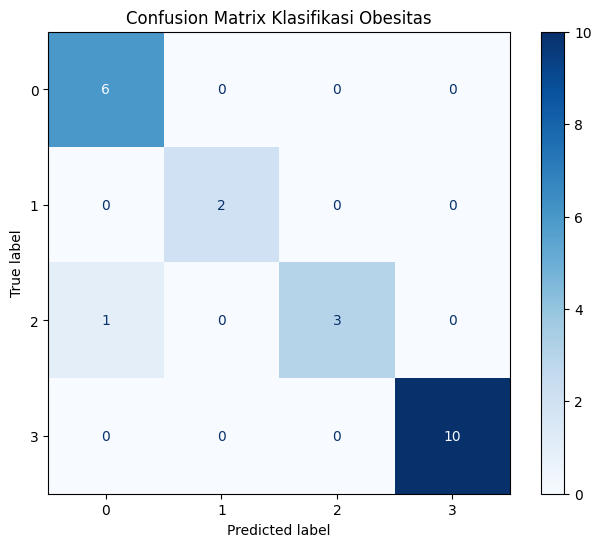

In [334]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Misalkan y_test dan y_pred sudah didefinisikan sebelumnya
# Contoh:
# y_test = np.array([...])  # Label asli
# y_pred = np.array([...])  # Prediksi model

# Inisialisasi LabelEncoder
le_label = LabelEncoder()

# Fit encoder dengan label asli
le_label.fit(y_test)

# Hitung matriks kebingungan
# Tidak perlu menginverse transform y_test, karena sudah dalam bentuk asli
y_pred_labels = le_label.inverse_transform(y_pred)

cm = confusion_matrix(y_test, y_pred_labels, labels=le_label.classes_)

# Dapatkan label kelas
labels = le_label.classes_

# Tampilkan matriks kebingungan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Klasifikasi Obesitas")
plt.show()

model decision tree c4.5

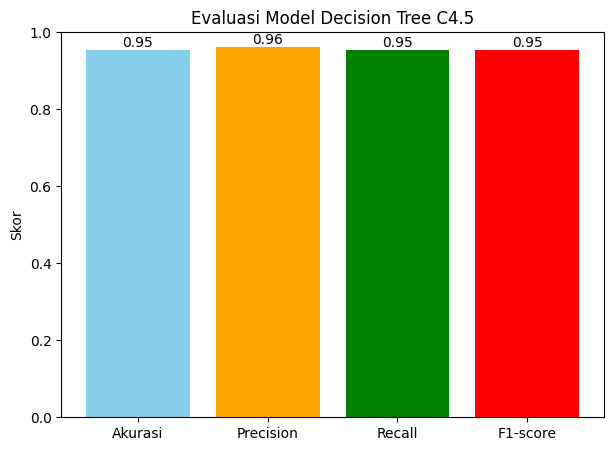

In [335]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

scores = [accuracy, precision, recall, f1]
score_names = ['Akurasi', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(7,5))
bars = plt.bar(score_names, scores, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Evaluasi Model Decision Tree C4.5')
plt.ylabel('Skor')
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')
plt.show()

### **pohon** **keputusan**

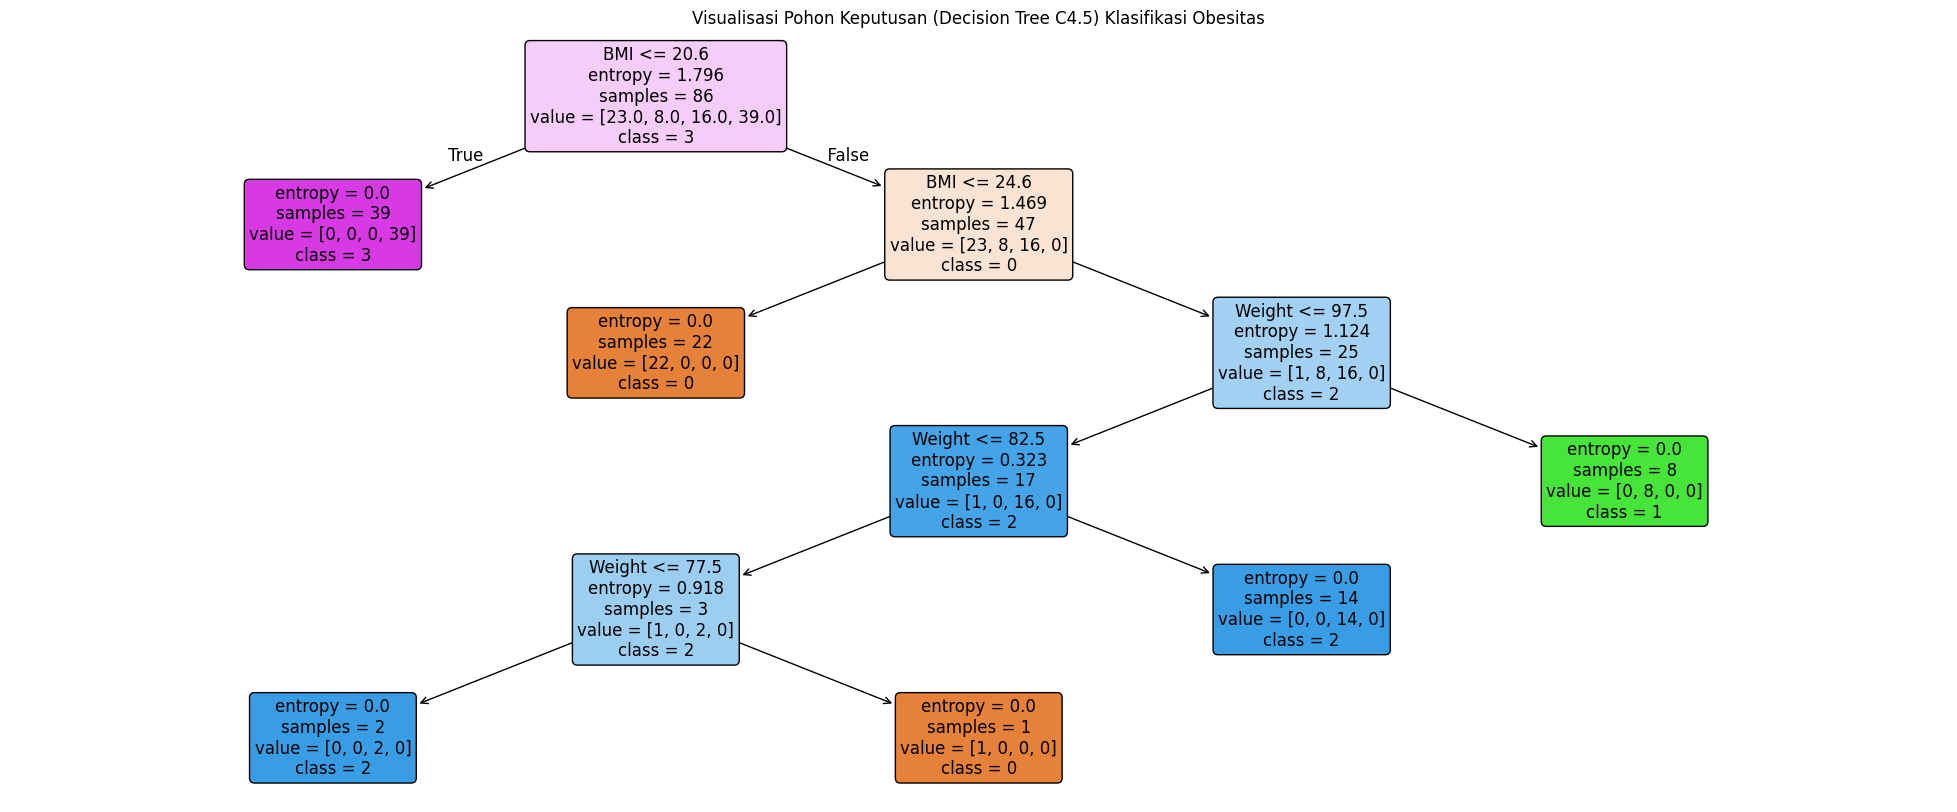

In [341]:
# Konversi class_names ke string
class_names = [str(c) for c in le_label.classes_]

# Visualisasi pohon keputusan
plt.figure(figsize=(25,10))
plot_tree(
    clf,
    feature_names=['Age', 'Gender', 'Height', 'Weight', 'BMI'],
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree C4.5) Klasifikasi Obesitas")
plt.show()